# Education Trend Analysis Project

#### This project will take a deep look at education attainment trends in the US. Trended data will span from 2008 to 2017. The hypothesis is that education attainment for the categories of Master's degree and higher experienced a  bump around 2011-12 as a result of the financial meltdown of 2008. Secondary hypothesis is that this increased rate of achievement was sustained beyond the initial shock and has far reaching effect in lower education levels as well resulting in higher a higher share of the American population with higher education attainment.

In [365]:
### libraries needed for analysis

import numpy as np
import pandas as pd
import csv
import urllib
import matplotlib.pyplot as plt
from functools import reduce


In [379]:
# grab raw data

url08 = 'https://raw.githubusercontent.com/TimSrenaski/DATA201/master/ACS_08_1YR_S1501_with_ann.csv'
url09 = 'https://raw.githubusercontent.com/TimSrenaski/DATA201/master/ACS_09_1YR_S1501_with_ann.csv'
url10 = 'https://raw.githubusercontent.com/TimSrenaski/DATA201/master/ACS_10_1YR_S1501_with_ann.csv'
url11 = 'https://raw.githubusercontent.com/TimSrenaski/DATA201/master/ACS_11_1YR_S1501_with_ann.csv'
url12 = 'https://raw.githubusercontent.com/TimSrenaski/DATA201/master/ACS_12_1YR_S1501_with_ann.csv'
url13 = 'https://raw.githubusercontent.com/TimSrenaski/DATA201/master/ACS_13_1YR_S1501_with_ann.csv'
url14 = 'https://raw.githubusercontent.com/TimSrenaski/DATA201/master/ACS_14_1YR_S1501_with_ann.csv'
url15 = 'https://raw.githubusercontent.com/TimSrenaski/DATA201/master/ACS_15_1YR_S1501_with_ann.csv'
url16 = 'https://raw.githubusercontent.com/TimSrenaski/DATA201/master/ACS_16_1YR_S1501_with_ann.csv'
url17 = 'https://raw.githubusercontent.com/TimSrenaski/DATA201/master/ACS_17_1YR_S1501_with_ann.csv'

raw2008 = pd.read_csv(url08, sep=',', encoding = 'latin-1')
raw2009 = pd.read_csv(url09, sep=',', encoding = 'latin-1')
raw2010 = pd.read_csv(url10, sep=',', encoding = 'latin-1')
raw2011 = pd.read_csv(url11, sep=',', encoding = 'latin-1')
raw2012 = pd.read_csv(url12, sep=',', encoding = 'latin-1')
raw2013 = pd.read_csv(url13, sep=',', encoding = 'latin-1')
raw2014 = pd.read_csv(url14, sep=',', encoding = 'latin-1')
raw2015 = pd.read_csv(url15, sep=',', encoding = 'latin-1')
raw2016 = pd.read_csv(url16, sep=',', encoding = 'latin-1')
raw2017 = pd.read_csv(url17, sep=',', encoding = 'latin-1')

In [380]:
raw2008.head()

GEO.id GEO.id2        GEO.display-label  \
0              Id     Id2                Geography   
1  0500000US01003   01003  Baldwin County, Alabama   
2  0500000US01015   01015  Calhoun County, Alabama   
3  0500000US01043   01043  Cullman County, Alabama   
4  0500000US01049   01049   DeKalb County, Alabama   

                                HC01_EST_VC01  \
0  Total; Estimate; Population 18 to 24 years   
1                                       12936   
2                                       11159   
3                                        6618   
4                                        4776   

                                       HC01_MOE_VC01  \
0  Total; Margin of Error; Population 18 to 24 years   
1                                                894   
2                                                674   
3                                                388   
4                                                539   

                               HC02_EST_VC01  \
0  Male; Estimate; Population 18 to 24 years   
1                                       6757   
2                                       5145   
3                                       3319   
4                                       2645   

                                      HC02_MOE_VC01  \
0  Male; Margin of Error; Population 18 to 24 years   
1                                               687   
2                                               526   
3                                               321   
4                                               537   

                                 HC03_EST_VC01  \
0  Female; Estimate; Population 18 to 24 years   
1                                         6179   
2                                         6014   
3                                         3299   
4                                         2131   

                                       HC03_MOE_VC01  \
0  Female; Margin of Error; Population 18 to 24 y...   
1                                                436   
2                                                276   
3                                                274   
4                                                 81   

                                       HC01_EST_VC02  \
0  Total; Estimate; Population 18 to 24 years - L...   
1                                               24.9   
2                                               25.0   
3                                               21.0   
4                                               26.4   

                         ...                          \
0                        ...                           
1                        ...                           
2                        ...                           
3                        ...                           
4                        ...                           

                                       HC02_EST_VC40  \
0  Male; Estimate; MEDIAN EARNINGS IN THE PAST 12...   
1                                              75431   
2                                              63094   
3                                              60695   
4                                              39268   

                                       HC02_MOE_VC40  \
0  Male; Margin of Error; MEDIAN EARNINGS IN THE ...   
1                                              24873   
2                                              30482   
3                                              18475   
4                                              42285   

                                       HC03_EST_VC40  \
0  Female; Estimate; MEDIAN EARNINGS IN THE PAST ...   
1                                              44011   
2                                              47728   
3                                              49938   
4                                              42029   

                                       HC03_MOE_VC40  \
0  Female; Margin of Error; MEDIAN EARNINGS IN TH...   

In [381]:
# clean and organize raw data




## create data table to trend each education attainment level that only includes county name, percent of pop for each year
### Less than high school education table
lessThanHighschool08 = raw2008[['GEO.display-label', 'HC01_EST_VC07']]
lessThanHighschool09 = raw2009[['GEO.display-label', 'HC01_EST_VC07']]
lessThanHighschool10 = raw2010[['GEO.display-label', 'HC01_EST_VC08']]
lessThanHighschool11 = raw2011[['GEO.display-label', 'HC01_EST_VC08']]
lessThanHighschool12 = raw2012[['GEO.display-label', 'HC01_EST_VC08']]
lessThanHighschool13 = raw2013[['GEO.display-label', 'HC01_EST_VC08']]
lessThanHighschool14 = raw2014[['GEO.display-label', 'HC01_EST_VC08']]
lessThanHighschool15 = raw2015[['GEO.display-label', 'HC02_EST_VC09']]
lessThanHighschool16 = raw2016[['GEO.display-label', 'HC02_EST_VC09']]
lessThanHighschool17 = raw2017[['GEO.display-label', 'HC02_EST_VC09']]

dfs = [lessThanHighschool08, lessThanHighschool09, lessThanHighschool10, lessThanHighschool11,
      lessThanHighschool12, lessThanHighschool13, lessThanHighschool14, lessThanHighschool15,
      lessThanHighschool16, lessThanHighschool17]

lessThanHighschoolTrendClean = reduce(lambda left, right: pd.merge(left, right, on='GEO.display-label'), dfs)

lessThanHighschoolTrendClean.columns = ['County', 'Share2008',
                                  'Share2009',
                                  'Share2010',
                                  'Share2011',
                                  'Share2012',
                                  'Share2013',
                                  'Share2014',
                                  'Share2015',
                                  'Share2016',
                                  'Share2017']


#lessThanHighschoolTrendClean

### High school education but no diploma education table
noDiploma08 = raw2008[['GEO.display-label', 'HC01_EST_VC08']]
noDiploma09 = raw2009[['GEO.display-label', 'HC01_EST_VC08']]
noDiploma10 = raw2010[['GEO.display-label', 'HC01_EST_VC09']]
noDiploma11 = raw2011[['GEO.display-label', 'HC01_EST_VC09']]
noDiploma12 = raw2012[['GEO.display-label', 'HC01_EST_VC09']]
noDiploma13 = raw2013[['GEO.display-label', 'HC01_EST_VC09']]
noDiploma14 = raw2014[['GEO.display-label', 'HC01_EST_VC09']]
noDiploma15 = raw2015[['GEO.display-label', 'HC02_EST_VC10']]
noDiploma16 = raw2016[['GEO.display-label', 'HC02_EST_VC10']]
noDiploma17 = raw2017[['GEO.display-label', 'HC02_EST_VC10']]

dfs = [noDiploma08, noDiploma09, noDiploma10, noDiploma11,
      noDiploma12, noDiploma13, noDiploma14, noDiploma15,
      noDiploma16, noDiploma17]

noDiplomaTrendClean = reduce(lambda left, right: pd.merge(left, right, on='GEO.display-label'), dfs)

noDiplomaTrendClean.columns = ['County', 'Share2008',
                                  'Share2009',
                                  'Share2010',
                                  'Share2011',
                                  'Share2012',
                                  'Share2013',
                                  'Share2014',
                                  'Share2015',
                                  'Share2016',
                                  'Share2017']


#noDiplomaTrendClean

### High school graduate education table
hsGrad08 = raw2008[['GEO.display-label', 'HC01_EST_VC09']]
hsGrad09 = raw2009[['GEO.display-label', 'HC01_EST_VC09']]
hsGrad10 = raw2010[['GEO.display-label', 'HC01_EST_VC10']]
hsGrad11 = raw2011[['GEO.display-label', 'HC01_EST_VC10']]
hsGrad12 = raw2012[['GEO.display-label', 'HC01_EST_VC10']]
hsGrad13 = raw2013[['GEO.display-label', 'HC01_EST_VC10']]
hsGrad14 = raw2014[['GEO.display-label', 'HC01_EST_VC10']]
hsGrad15 = raw2015[['GEO.display-label', 'HC02_EST_VC11']]
hsGrad16 = raw2016[['GEO.display-label', 'HC02_EST_VC11']]
hsGrad17 = raw2017[['GEO.display-label', 'HC02_EST_VC11']]

dfs = [hsGrad08, hsGrad09, hsGrad10, hsGrad11,
      hsGrad12, hsGrad13, hsGrad14, hsGrad15,
      hsGrad16, hsGrad17]

hsGradTrendClean = reduce(lambda left, right: pd.merge(left, right, on='GEO.display-label'), dfs)

hsGradTrendClean.columns = ['County', 'Share2008',
                                  'Share2009',
                                  'Share2010',
                                  'Share2011',
                                  'Share2012',
                                  'Share2013',
                                  'Share2014',
                                  'Share2015',
                                  'Share2016',
                                  'Share2017']


#hsGradTrendClean

### Some college education table
someCollege08 = raw2008[['GEO.display-label', 'HC01_EST_VC10']]
someCollege09 = raw2009[['GEO.display-label', 'HC01_EST_VC10']]
someCollege10 = raw2010[['GEO.display-label', 'HC01_EST_VC11']]
someCollege11 = raw2011[['GEO.display-label', 'HC01_EST_VC11']]
someCollege12 = raw2012[['GEO.display-label', 'HC01_EST_VC11']]
someCollege13 = raw2013[['GEO.display-label', 'HC01_EST_VC11']]
someCollege14 = raw2014[['GEO.display-label', 'HC01_EST_VC11']]
someCollege15 = raw2015[['GEO.display-label', 'HC02_EST_VC12']]
someCollege16 = raw2016[['GEO.display-label', 'HC02_EST_VC12']]
someCollege17 = raw2017[['GEO.display-label', 'HC02_EST_VC12']]

dfs = [someCollege08, someCollege09, someCollege10, someCollege11,
      someCollege12, someCollege13, someCollege14, someCollege15,
      someCollege16, someCollege17]

someCollegeTrendClean = reduce(lambda left, right: pd.merge(left, right, on='GEO.display-label'), dfs)

someCollegeTrendClean.columns = ['County', 'Share2008',
                                  'Share2009',
                                  'Share2010',
                                  'Share2011',
                                  'Share2012',
                                  'Share2013',
                                  'Share2014',
                                  'Share2015',
                                  'Share2016',
                                  'Share2017']


#someCollegeTrendClean

### Associate Degree education table
associate08 = raw2008[['GEO.display-label', 'HC01_EST_VC11']]
associate09 = raw2009[['GEO.display-label', 'HC01_EST_VC11']]
associate10 = raw2010[['GEO.display-label', 'HC01_EST_VC12']]
associate11 = raw2011[['GEO.display-label', 'HC01_EST_VC12']]
associate12 = raw2012[['GEO.display-label', 'HC01_EST_VC12']]
associate13 = raw2013[['GEO.display-label', 'HC01_EST_VC12']]
associate14 = raw2014[['GEO.display-label', 'HC01_EST_VC12']]
associate15 = raw2015[['GEO.display-label', 'HC02_EST_VC13']]
associate16 = raw2016[['GEO.display-label', 'HC02_EST_VC13']]
associate17 = raw2017[['GEO.display-label', 'HC02_EST_VC13']]

dfs = [associate08, associate09, associate10, associate11,
      associate12, associate13, associate14, associate15,
      associate16, associate17]

associateTrendClean = reduce(lambda left, right: pd.merge(left, right, on='GEO.display-label'), dfs)

associateTrendClean.columns = ['County', 'Share2008',
                                  'Share2009',
                                  'Share2010',
                                  'Share2011',
                                  'Share2012',
                                  'Share2013',
                                  'Share2014',
                                  'Share2015',
                                  'Share2016',
                                  'Share2017']


#associateTrendClean

### Bachelor Degree education table
bachelor08 = raw2008[['GEO.display-label', 'HC01_EST_VC12']]
bachelor09 = raw2009[['GEO.display-label', 'HC01_EST_VC12']]
bachelor10 = raw2010[['GEO.display-label', 'HC01_EST_VC13']]
bachelor11 = raw2011[['GEO.display-label', 'HC01_EST_VC13']]
bachelor12 = raw2012[['GEO.display-label', 'HC01_EST_VC13']]
bachelor13 = raw2013[['GEO.display-label', 'HC01_EST_VC13']]
bachelor14 = raw2014[['GEO.display-label', 'HC01_EST_VC13']]
bachelor15 = raw2015[['GEO.display-label', 'HC02_EST_VC14']]
bachelor16 = raw2016[['GEO.display-label', 'HC02_EST_VC14']]
bachelor17 = raw2017[['GEO.display-label', 'HC02_EST_VC14']]

dfs = [bachelor08, bachelor09, bachelor10, bachelor11,
      bachelor12, bachelor13, bachelor14, bachelor15,
      bachelor16, bachelor17]

bachelorTrendClean = reduce(lambda left, right: pd.merge(left, right, on='GEO.display-label'), dfs)

bachelorTrendClean.columns = ['County', 'Share2008',
                                  'Share2009',
                                  'Share2010',
                                  'Share2011',
                                  'Share2012',
                                  'Share2013',
                                  'Share2014',
                                  'Share2015',
                                  'Share2016',
                                  'Share2017']


#bachelorTrendClean

### Graduate or Professional Degree education table
grad08 = raw2008[['GEO.display-label', 'HC01_EST_VC13']]
grad09 = raw2009[['GEO.display-label', 'HC01_EST_VC13']]
grad10 = raw2010[['GEO.display-label', 'HC01_EST_VC14']]
grad11 = raw2011[['GEO.display-label', 'HC01_EST_VC14']]
grad12 = raw2012[['GEO.display-label', 'HC01_EST_VC14']]
grad13 = raw2013[['GEO.display-label', 'HC01_EST_VC14']]
grad14 = raw2014[['GEO.display-label', 'HC01_EST_VC14']]
grad15 = raw2015[['GEO.display-label', 'HC02_EST_VC15']]
grad16 = raw2016[['GEO.display-label', 'HC02_EST_VC15']]
grad17 = raw2017[['GEO.display-label', 'HC02_EST_VC15']]

dfs = [grad08, grad09, grad10, grad11,
      grad12, grad13, grad14, grad15,
      grad16, grad17]

gradTrendClean = reduce(lambda left, right: pd.merge(left, right, on='GEO.display-label'), dfs)

gradTrendClean.columns = ['County', 'Share2008',
                                  'Share2009',
                                  'Share2010',
                                  'Share2011',
                                  'Share2012',
                                  'Share2013',
                                  'Share2014',
                                  'Share2015',
                                  'Share2016',
                                  'Share2017']


gradTrendClean

County  \
0                               Geography   
1                 Baldwin County, Alabama   
2                 Calhoun County, Alabama   
3                 Cullman County, Alabama   
4                  DeKalb County, Alabama   
5                  Elmore County, Alabama   
6                  Etowah County, Alabama   
7                 Houston County, Alabama   
8               Jefferson County, Alabama   
9              Lauderdale County, Alabama   
10                    Lee County, Alabama   
11              Limestone County, Alabama   
12                Madison County, Alabama   
13               Marshall County, Alabama   
14                 Mobile County, Alabama   
15             Montgomery County, Alabama   
16                 Morgan County, Alabama   
17              St. Clair County, Alabama   
18                 Shelby County, Alabama   
19              Talladega County, Alabama   
20             Tuscaloosa County, Alabama   
21                 Walker County, Alabama   
22         Anchorage Municipality, Alaska   
23   Fairbanks North Star Borough, Alaska   
24      Matanuska-Susitna Borough, Alaska   
25                 Apache County, Arizona   
26                Cochise County, Arizona   
27               Coconino County, Arizona   
28               Maricopa County, Arizona   
29                 Mohave County, Arizona   
..                                    ...   
759        Harrison County, West Virginia   
760         Kanawha County, West Virginia   
761      Monongalia County, West Virginia   
762         Raleigh County, West Virginia   
763            Wood County, West Virginia   
764               Brown County, Wisconsin   
765                Dane County, Wisconsin   
766               Dodge County, Wisconsin   
767          Eau Claire County, Wisconsin   
768         Fond du Lac County, Wisconsin   
769           Jefferson County, Wisconsin   
770             Kenosha County, Wisconsin   
771           La Crosse County, Wisconsin   
772           Manitowoc County, Wisconsin   
773            Marathon County, Wisconsin   
774           Milwaukee County, Wisconsin   
775           Outagamie County, Wisconsin   
776             Ozaukee County, Wisconsin   
777             Portage County, Wisconsin   
778              Racine County, Wisconsin   
779                Rock County, Wisconsin   
780           St. Croix County, Wisconsin   
781           Sheboygan County, Wisconsin   
782            Walworth County, Wisconsin   
783          Washington County, Wisconsin   
784            Waukesha County, Wisconsin   
785           Winnebago County, Wisconsin   
786                Wood County, Wisconsin   
787               Laramie County, Wyoming   
788               Natrona County, Wyoming   

                                             Share2008  \
0    Total; Estimate; Population 25 years and over ...   
1                                                  8.7   
2                                                  6.6   
3                                                  5.4   
4                                                  3.5   
5                                                  5.9   
6                                                  7.6   
7                                                  6.7   
8                                                 10.3   
9                                                  8.3   
10                                                13.7   
11                                                 6.3   
12                                                12.5   
13                                                 4.9   
14                                                 6.9   
15                                                11.3   
16                                                 4.9   
17                                                 3.7   
18                                                13.1   
19                                                 3.4   
20                        

In [382]:
#Remove column headers
## Less than high school education
lessThanHighschoolTrendClean = lessThanHighschoolTrendClean.drop(lessThanHighschoolTrendClean.index[0])
#lessThanHighschoolTrendClean

## High school education but no diploma
noDiplomaTrendClean = noDiplomaTrendClean.drop(noDiplomaTrendClean.index[0])
#noDiplomaTrendClean

## High school graduate
hsGradTrendClean = hsGradTrendClean.drop(hsGradTrendClean.index[0])
#hsGradTrendClean

## Some college
someCollegeTrendClean = someCollegeTrendClean.drop(someCollegeTrendClean.index[0])
#someCollegeTrendClean

## Associate degree
associateTrendClean = associateTrendClean.drop(associateTrendClean.index[0])
#associateTrendClean

## Bachelor degree
bachelorTrendClean = bachelorTrendClean.drop(bachelorTrendClean.index[0])
#bachelorTrendClean

## Graduate or Professional degree
gradTrendClean = gradTrendClean.drop(gradTrendClean.index[0])
gradTrendClean

County Share2008 Share2009 Share2010  \
1                 Baldwin County, Alabama       8.7       8.5       7.4   
2                 Calhoun County, Alabama       6.6       6.8       5.0   
3                 Cullman County, Alabama       5.4       5.1       5.2   
4                  DeKalb County, Alabama       3.5       3.5       4.2   
5                  Elmore County, Alabama       5.9       7.7       8.1   
6                  Etowah County, Alabama       7.6       4.6       4.7   
7                 Houston County, Alabama       6.7       6.6       6.9   
8               Jefferson County, Alabama      10.3      10.5      10.6   
9              Lauderdale County, Alabama       8.3       6.3       9.0   
10                    Lee County, Alabama      13.7      12.3      14.0   
11              Limestone County, Alabama       6.3       4.8       7.8   
12                Madison County, Alabama      12.5      13.4      14.8   
13               Marshall County, Alabama       4.9       4.4       5.4   
14                 Mobile County, Alabama       6.9       6.2       7.0   
15             Montgomery County, Alabama      11.3      11.3      13.6   
16                 Morgan County, Alabama       4.9       6.2       5.2   
17              St. Clair County, Alabama       3.7       4.4       3.3   
18                 Shelby County, Alabama      13.1      11.8      12.1   
19              Talladega County, Alabama       3.4       5.9       4.6   
20             Tuscaloosa County, Alabama      10.4      11.1      11.1   
21                 Walker County, Alabama       5.6       3.8       2.6   
22         Anchorage Municipality, Alaska      12.1      10.4      11.3   
23   Fairbanks North Star Borough, Alaska      11.4      11.2       9.6   
24      Matanuska-Susitna Borough, Alaska       7.0       5.1       6.9   
25                 Apache County, Arizona       3.6       2.5       3.8   
26                Cochise County, Arizona       8.5       9.1       7.5   
27               Coconino County, Arizona      11.9      12.0      13.4   
28               Maricopa County, Arizona       9.7      10.0       9.6   
29                 Mohave County, Arizona       3.3       3.7       4.6   
30                 Navajo County, Arizona       5.4       4.5       6.5   
..                                    ...       ...       ...       ...   
759        Harrison County, West Virginia       3.8       7.2       8.6   
760         Kanawha County, West Virginia       9.1       9.3      10.2   
761      Monongalia County, West Virginia      19.1      19.3      16.9   
762         Raleigh County, West Virginia       6.3       4.9       7.1   
763            Wood County, West Virginia       6.0       6.7       6.3   
764               Brown County, Wisconsin       7.3       6.6       7.0   
765                Dane County, Wisconsin      18.1      17.0      19.0   
766               Dodge County, Wisconsin       4.6       3.9       4.3   
767          Eau Claire County, Wisconsin      10.1       7.8      11.0   
768         Fond du Lac County, Wisconsin       6.7       5.6       5.5   
769           Jefferson County, Wisconsin       7.4       8.2       7.9   
770             Kenosha County, Wisconsin       7.6       6.2       6.9   
771           La Crosse County, Wisconsin      10.4      10.2      11.9   
772           Manitowoc County, Wisconsin       4.8       6.5       5.1   
773            Marathon County, Wisconsin       7.5       7.2       5.9   
774           Milwaukee County, Wisconsin       9.8       9.7       9.8   
775           Outagamie County, Wisconsin       7.1       5.9       7.6   
776             Ozaukee County, Wisconsin      14.8      13.3      20.3   
777             Portage County, Wisconsin       8.7       9.1       7.8   
778              Racine County, Wisconsin       7.5       6.7       8.3   
779                Rock County, Wisconsin       7.6       5.2       6.7   
780           St. Croix County, Wisconsin       8.8       7.

In [383]:
#Convert column data types from objects to float
## Less than high school education
lessThanHighschoolTrendClean[['Share2008',
                             'Share2009',
                             'Share2010',
                             'Share2011',
                             'Share2012',
                             'Share2013',
                             'Share2014',
                             'Share2015',
                             'Share2016',
                             'Share2017']] = lessThanHighschoolTrendClean[['Share2008', 'Share2009', 'Share2010',
                                                                          'Share2011', 'Share2012', 'Share2013',
                                                                          'Share2014', 'Share2015', 'Share2016',
                                                                          'Share2017']].apply(pd.to_numeric)

#lessThanHighschoolTrendClean.dtypes

## High school education but no diploma
noDiplomaTrendClean[['Share2008',
                             'Share2009',
                             'Share2010',
                             'Share2011',
                             'Share2012',
                             'Share2013',
                             'Share2014',
                             'Share2015',
                             'Share2016',
                             'Share2017']] = noDiplomaTrendClean[['Share2008', 'Share2009', 'Share2010',
                                                                          'Share2011', 'Share2012', 'Share2013',
                                                                          'Share2014', 'Share2015', 'Share2016',
                                                                          'Share2017']].apply(pd.to_numeric)

#noDiplomaTrendClean.dtypes

## High school graduate
hsGradTrendClean[['Share2008',
                             'Share2009',
                             'Share2010',
                             'Share2011',
                             'Share2012',
                             'Share2013',
                             'Share2014',
                             'Share2015',
                             'Share2016',
                             'Share2017']] = hsGradTrendClean[['Share2008', 'Share2009', 'Share2010',
                                                                          'Share2011', 'Share2012', 'Share2013',
                                                                          'Share2014', 'Share2015', 'Share2016',
                                                                          'Share2017']].apply(pd.to_numeric)

#hsGradTrendClean.dtypes

## Some College
someCollegeTrendClean[['Share2008',
                             'Share2009',
                             'Share2010',
                             'Share2011',
                             'Share2012',
                             'Share2013',
                             'Share2014',
                             'Share2015',
                             'Share2016',
                             'Share2017']] = someCollegeTrendClean[['Share2008', 'Share2009', 'Share2010',
                                                                          'Share2011', 'Share2012', 'Share2013',
                                                                          'Share2014', 'Share2015', 'Share2016',
                                                                          'Share2017']].apply(pd.to_numeric)

#someCollegeTrendClean.dtypes

## Associate degree
associateTrendClean[['Share2008',
                             'Share2009',
                             'Share2010',
                             'Share2011',
                             'Share2012',
                             'Share2013',
                             'Share2014',
                             'Share2015',
                             'Share2016',
                             'Share2017']] = associateTrendClean[['Share2008', 'Share2009', 'Share2010',
                                                                          'Share2011', 'Share2012', 'Share2013',
                                                                          'Share2014', 'Share2015', 'Share2016',
                                                                          'Share2017']].apply(pd.to_numeric)

#associateTrendClean.dtypes

## Bachelor degree
bachelorTrendClean[['Share2008',
                             'Share2009',
                             'Share2010',
                             'Share2011',
                             'Share2012',
                             'Share2013',
                             'Share2014',
                             'Share2015',
                             'Share2016',
                             'Share2017']] = bachelorTrendClean[['Share2008', 'Share2009', 'Share2010',
                                                                          'Share2011', 'Share2012', 'Share2013',
                                                                          'Share2014', 'Share2015', 'Share2016',
                                                                          'Share2017']].apply(pd.to_numeric)

#bachelorTrendClean.dtypes

## Graduate or Professional degree
gradTrendClean[['Share2008',
                             'Share2009',
                             'Share2010',
                             'Share2011',
                             'Share2012',
                             'Share2013',
                             'Share2014',
                             'Share2015',
                             'Share2016',
                             'Share2017']] = gradTrendClean[['Share2008', 'Share2009', 'Share2010',
                                                                          'Share2011', 'Share2012', 'Share2013',
                                                                          'Share2014', 'Share2015', 'Share2016',
                                                                          'Share2017']].apply(pd.to_numeric)

gradTrendClean.dtypes

County        object
Share2008    float64
Share2009    float64
Share2010    float64
Share2011    float64
Share2012    float64
Share2013    float64
Share2014    float64
Share2015    float64
Share2016    float64
Share2017    float64
dtype: object

In [384]:
# Find the mean share across the nation

## Less than a high school education
lessThanHighschoolTrendClean.loc["Median"]=lessThanHighschoolTrendClean.median(axis=0)
#lessThanHighschoolTrendClean

## High school education no diploma
noDiplomaTrendClean.loc["Median"]=noDiplomaTrendClean.median(axis=0)
#noDiplomaTrendClean

## High school graduate
hsGradTrendClean.loc["Median"]=hsGradTrendClean.median(axis=0)
#hsGradTrendClean

## Some college
someCollegeTrendClean.loc["Median"]=someCollegeTrendClean.median(axis=0)
#someCollegeTrendClean

## Associate Degree
associateTrendClean.loc["Median"]=associateTrendClean.median(axis=0)
#associateTrendClean

## Bachelor Degree
bachelorTrendClean.loc["Median"]=bachelorTrendClean.median(axis=0)
#bachelorTrendClean

## Graduate or Professional Degree
gradTrendClean.loc["Median"]=gradTrendClean.median(axis=0)
gradTrendClean

County  Share2008  Share2009  Share2010  \
1                    Baldwin County, Alabama        8.7        8.5        7.4   
2                    Calhoun County, Alabama        6.6        6.8        5.0   
3                    Cullman County, Alabama        5.4        5.1        5.2   
4                     DeKalb County, Alabama        3.5        3.5        4.2   
5                     Elmore County, Alabama        5.9        7.7        8.1   
6                     Etowah County, Alabama        7.6        4.6        4.7   
7                    Houston County, Alabama        6.7        6.6        6.9   
8                  Jefferson County, Alabama       10.3       10.5       10.6   
9                 Lauderdale County, Alabama        8.3        6.3        9.0   
10                       Lee County, Alabama       13.7       12.3       14.0   
11                 Limestone County, Alabama        6.3        4.8        7.8   
12                   Madison County, Alabama       12.5       13.4       14.8   
13                  Marshall County, Alabama        4.9        4.4        5.4   
14                    Mobile County, Alabama        6.9        6.2        7.0   
15                Montgomery County, Alabama       11.3       11.3       13.6   
16                    Morgan County, Alabama        4.9        6.2        5.2   
17                 St. Clair County, Alabama        3.7        4.4        3.3   
18                    Shelby County, Alabama       13.1       11.8       12.1   
19                 Talladega County, Alabama        3.4        5.9        4.6   
20                Tuscaloosa County, Alabama       10.4       11.1       11.1   
21                    Walker County, Alabama        5.6        3.8        2.6   
22            Anchorage Municipality, Alaska       12.1       10.4       11.3   
23      Fairbanks North Star Borough, Alaska       11.4       11.2        9.6   
24         Matanuska-Susitna Borough, Alaska        7.0        5.1        6.9   
25                    Apache County, Arizona        3.6        2.5        3.8   
26                   Cochise County, Arizona        8.5        9.1        7.5   
27                  Coconino County, Arizona       11.9       12.0       13.4   
28                  Maricopa County, Arizona        9.7       10.0        9.6   
29                    Mohave County, Arizona        3.3        3.7        4.6   
30                    Navajo County, Arizona        5.4        4.5        6.5   
...                                      ...        ...        ...        ...   
760            Kanawha County, West Virginia        9.1        9.3       10.2   
761         Monongalia County, West Virginia       19.1       19.3       16.9   
762            Raleigh County, West Virginia        6.3        4.9        7.1   
763               Wood County, West Virginia        6.0        6.7        6.3   
764                  Brown County, Wisconsin        7.3        6.6        7.0   
765                   Dane County, Wisconsin       18.1       17.0       19.0   
766                  Dodge County, Wisconsin        4.6        3.9        4.3   
767             Eau Claire County, Wisconsin       10.1        7.8       11.0   
768            Fond du Lac County, Wisconsin        6.7        5.6        5.5   
769              Jefferson County, Wisconsin        7.4        8.2        7.9   
770                Kenosha County, Wisconsin        7.6        6.2        6.9   
771              La Crosse County, Wisconsin       10.4       10.2       11.9   
772              Manitowoc County, Wisconsin        4.8        6.5        5.1   
773               Marathon County, Wisconsin        7.5        7.2        5.9   
774              Milwaukee County, Wisconsin        9.8        9.7        9.8   
775              Outagamie County, Wisconsin        7.1        5.9        7.6   
776                Ozaukee County, Wisconsin       14.8       13.3       20.3   
777                Portage County, Wisconsin        8.7        9.1   

In [385]:
#Prepare the table for graphing by transposing the data and adding a year column

## Less than a high school education
lessThanHighschoolTrendCleanT = lessThanHighschoolTrendClean.T
lessThanHighschoolTrendCleanT = lessThanHighschoolTrendCleanT.drop(['County'])
lessThanHighschoolTrendCleanT['year'] = (('2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'))
#lessThanHighschoolTrendCleanT

## High school education no diploma
noDiplomaTrendCleanT = noDiplomaTrendClean.T
noDiplomaTrendCleanT = noDiplomaTrendCleanT.drop(['County'])
noDiplomaTrendCleanT['year'] = (('2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'))
#noDiplomaTrendCleanT

## High school graduate
hsGradTrendCleanT = hsGradTrendClean.T
hsGradTrendCleanT = hsGradTrendCleanT.drop(['County'])
hsGradTrendCleanT['year'] = (('2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'))
#hsGradTrendCleanT

## Some college
someCollegeTrendCleanT = someCollegeTrendClean.T
someCollegeTrendCleanT = someCollegeTrendCleanT.drop(['County'])
someCollegeTrendCleanT['year'] = (('2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'))
#someCollegeTrendCleanT

## Associate degree
associateTrendCleanT = associateTrendClean.T
associateTrendCleanT = associateTrendCleanT.drop(['County'])
associateTrendCleanT['year'] = (('2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'))
#associateTrendCleanT

## Bachelor degree
bachelorTrendCleanT = bachelorTrendClean.T
bachelorTrendCleanT = bachelorTrendCleanT.drop(['County'])
bachelorTrendCleanT['year'] = (('2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'))
#bachelorTrendCleanT

## Graduate or Professional degree
gradTrendCleanT = gradTrendClean.T
gradTrendCleanT = gradTrendCleanT.drop(['County'])
gradTrendCleanT['year'] = (('2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'))
gradTrendCleanT

1    2    3    4     5    6    7     8     9    10  ...   781  \
Share2008   8.7  6.6  5.4  3.5   5.9  7.6  6.7  10.3   8.3  13.7  ...   5.6   
Share2009   8.5  6.8  5.1  3.5   7.7  4.6  6.6  10.5   6.3  12.3  ...   6.1   
Share2010   7.4    5  5.2  4.2   8.1  4.7  6.9  10.6     9    14  ...   6.6   
Share2011   9.9  5.3  5.3  4.8   6.1  6.1  6.9  11.5   8.8  13.8  ...   7.9   
Share2012    10  6.2  5.4  2.9   7.4  4.6  7.3  12.5   9.3  14.4  ...   7.5   
Share2013   9.2  6.5  6.2  6.3     8  6.3  7.1  12.3   6.3  16.9  ...   6.8   
Share2014  10.5  6.8  5.1  4.6   8.5  6.6  6.1  12.3  10.4  12.9  ...   6.1   
Share2015   8.5  7.6  5.1    5   7.2  6.4  8.6  12.2    10  13.8  ...   7.6   
Share2016  12.3  7.2  5.5  4.1  10.2  5.9  7.2  12.9   7.5    16  ...   6.9   
Share2017  10.6  8.7  4.7  5.3   8.9  7.7  8.4  12.7     9  15.5  ...   7.6   

            782  783   784  785  786   787  788 Median  year  
Share2008   6.5  5.8  12.8  7.9  6.2   8.2  7.5    8.4  2008  
Share2009   8.8    9  12.6  7.3  6.9   8.7  8.3    8.6  2009  
Share2010   8.1  7.2  13.5  7.2  7.6   8.3  5.5    8.7  2010  
Share2011   9.2  8.9  12.5  7.5  5.7   8.8  6.2      9  2011  
Share2012   9.4  8.8  13.4  8.8    6   8.1  8.4    9.2  2012  
Share2013   9.4  7.9  13.1  6.8  7.5  11.5  7.7   9.45  2013  
Share2014  10.7  6.5  14.9  8.2  6.8    10  7.8    9.7  2014  
Share2015   9.2  7.6  14.5  7.2  7.7  10.5  8.3    9.7  2015  
Share2016  11.3  9.4  15.1  8.1  8.7   9.9  9.2  10.15  2016  
Share2017  11.1  8.7  15.1    9  7.7  11.9  8.5   10.6  2017  

[10 rows x 790 columns]

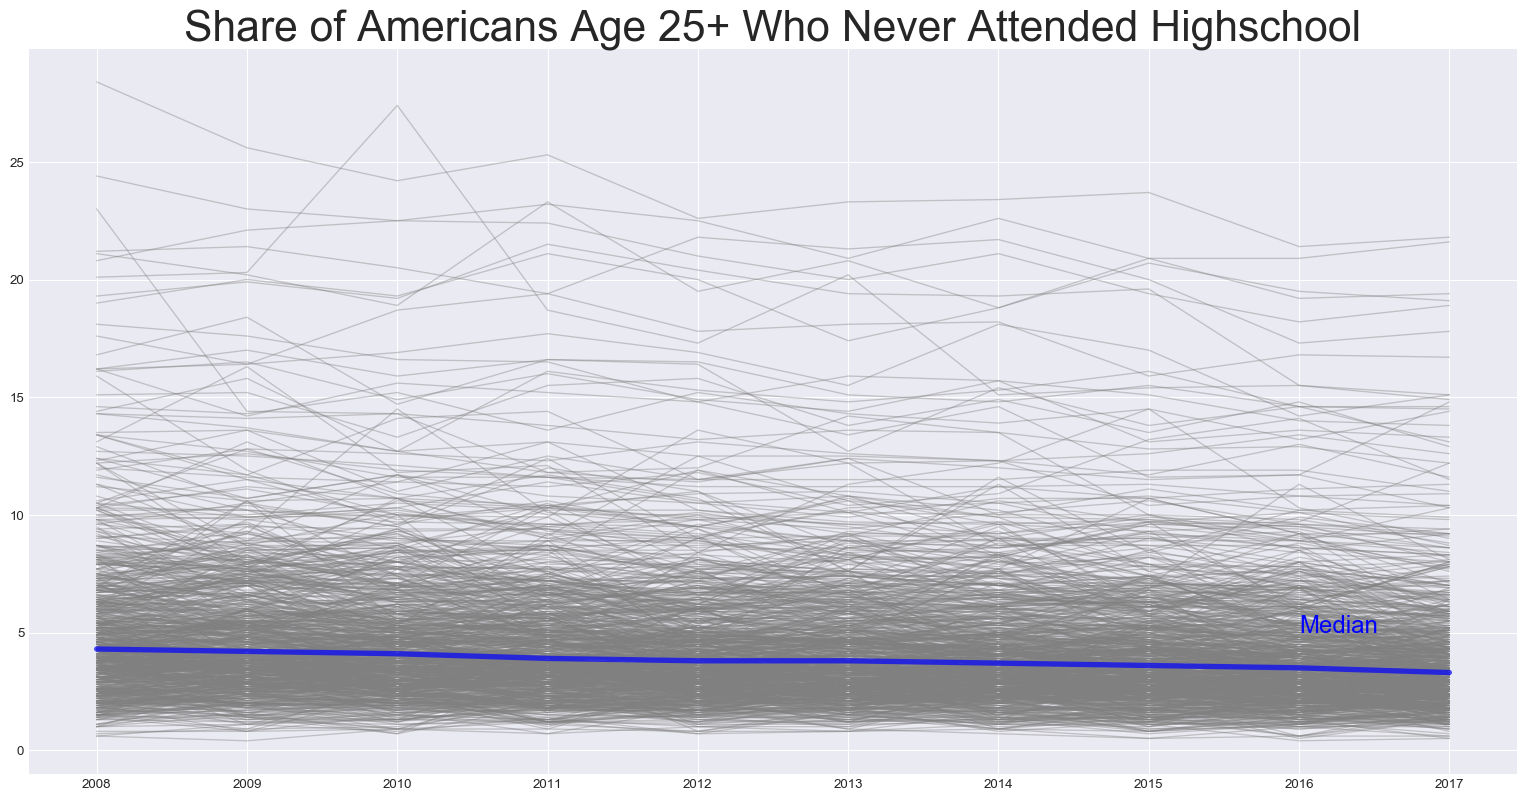

In [386]:
#Establish a style for graphs
##Less than high school education
plt.style.use('seaborn-darkgrid')
my_dpi = 96
plt.figure(figsize=(1920/my_dpi, 960/my_dpi), dpi=my_dpi)

# multiple line plot
##Less than high school education
for column in lessThanHighschoolTrendCleanT.drop('year', axis=1):
    plt.plot(lessThanHighschoolTrendCleanT['year'], lessThanHighschoolTrendCleanT[column], marker='', color='grey', linewidth=1, alpha=0.4)

# highlight the mean
##Less than high school education
plt.plot(lessThanHighschoolTrendCleanT['year'], lessThanHighschoolTrendCleanT['Median'], marker='', color='blue', linewidth = 4, alpha = 0.7)    

# Add chart titles and mean label
## Less than a high school education
plt.title("Share of Americans Age 25+ Who Never Attended Highschool", size=32)
plt.text(8, 5, "Median", size=18, color='blue')

plt.show()


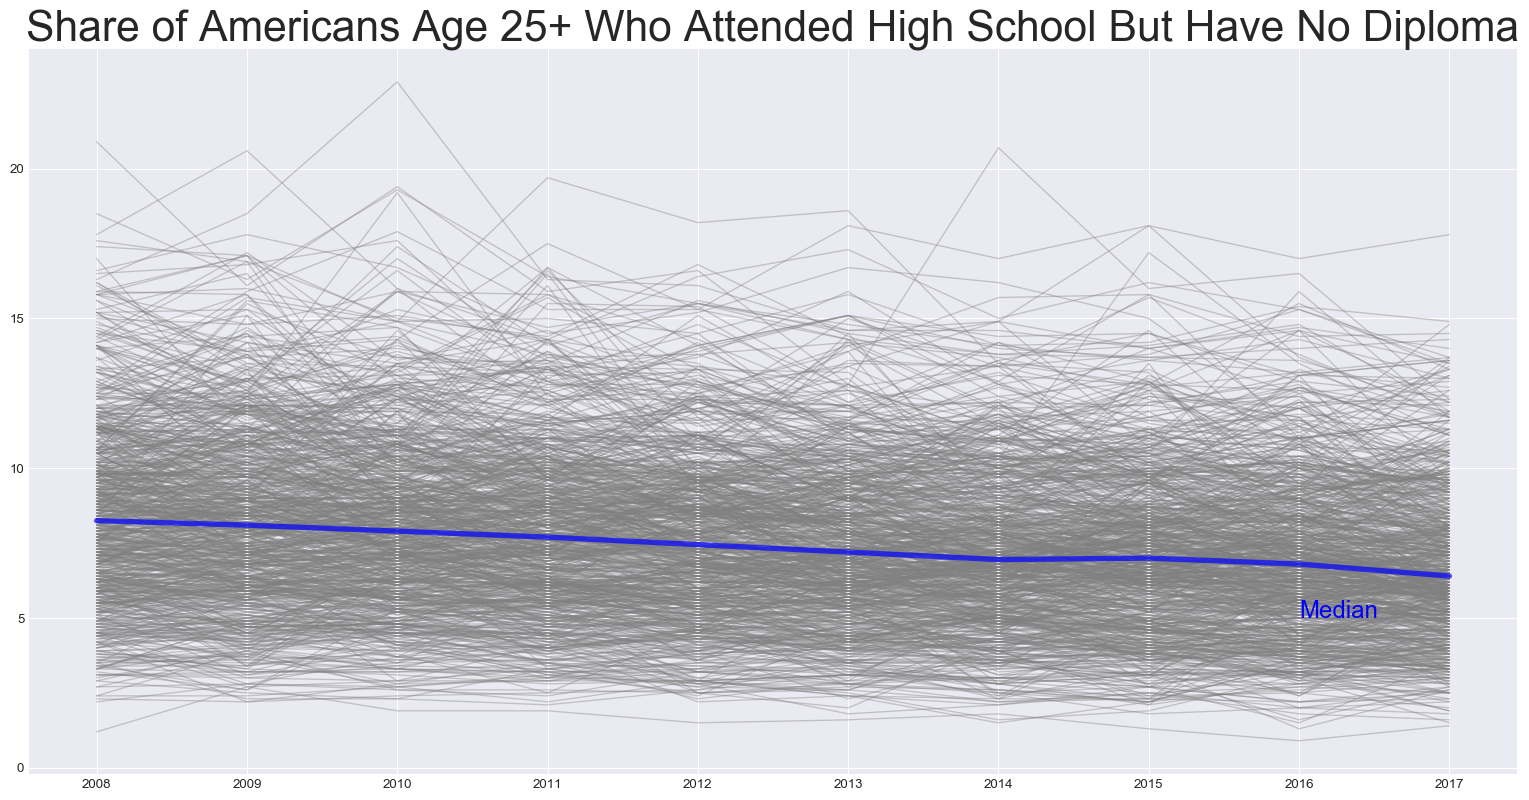

In [387]:
##High school education no diploma
plt.style.use('seaborn-darkgrid')
my_dpi = 96
plt.figure(figsize=(1920/my_dpi, 960/my_dpi), dpi=my_dpi)

# multiple line plot
##High school education do diploma
for column in noDiplomaTrendCleanT.drop('year', axis=1):
    plt.plot(noDiplomaTrendCleanT['year'], noDiplomaTrendCleanT[column], marker='', color='grey', linewidth=1, alpha=0.4)    

# highlight the mean
##High school education no diploma
plt.plot(noDiplomaTrendCleanT['year'], noDiplomaTrendCleanT['Median'], marker='', color='blue', linewidth = 4, alpha = 0.7)

# Add chart titles and mean label
## High school education no dipoloma
plt.title("Share of Americans Age 25+ Who Attended High School But Have No Diploma", size=32)
plt.text(8, 5, "Median", size=18, color='blue')

plt.show()

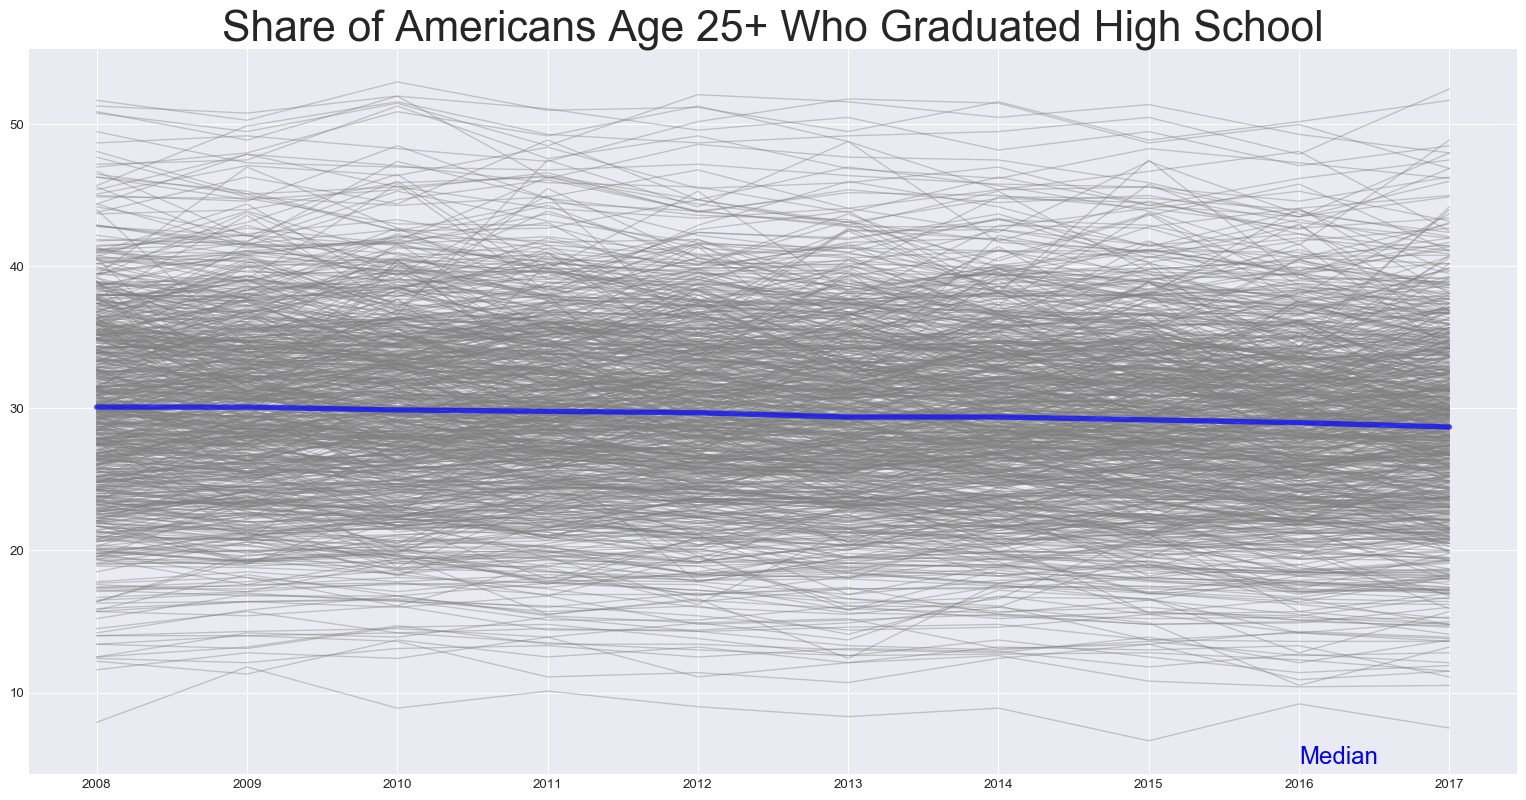

In [388]:
#Establish a style for graphs
##High school graduate
plt.style.use('seaborn-darkgrid')
my_dpi = 96
plt.figure(figsize=(1920/my_dpi, 960/my_dpi), dpi=my_dpi)

# multiple line plot
##High school graduate
for column in hsGradTrendCleanT.drop('year', axis=1):
    plt.plot(hsGradTrendCleanT['year'], hsGradTrendCleanT[column], marker='', color='grey', linewidth=1, alpha=0.4)

# highlight the mean
##High school graduate
plt.plot(hsGradTrendCleanT['year'], hsGradTrendCleanT['Median'], marker='', color='blue', linewidth = 4, alpha = 0.7)    

# Add chart titles and mean label
##High school graduate
plt.title("Share of Americans Age 25+ Who Graduated High School", size=32)
plt.text(8, 5, "Median", size=18, color='blue')

plt.show()


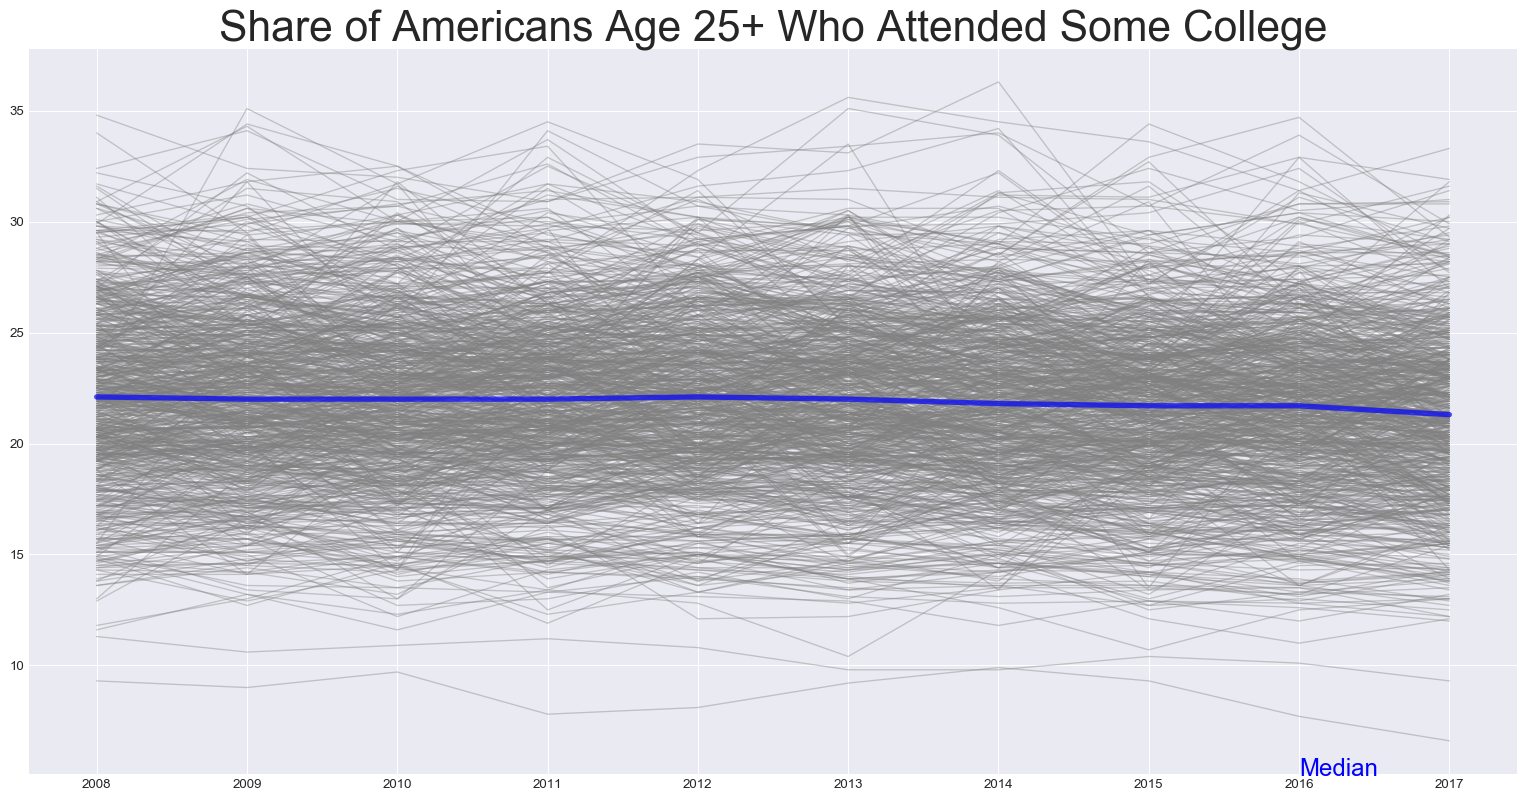

In [389]:
#Establish a style for graphs
## Some college
plt.style.use('seaborn-darkgrid')
my_dpi = 96
plt.figure(figsize=(1920/my_dpi, 960/my_dpi), dpi=my_dpi)

# multiple line plot
## Some college
for column in someCollegeTrendCleanT.drop('year', axis=1):
    plt.plot(someCollegeTrendCleanT['year'], someCollegeTrendCleanT[column], marker='', color='grey', linewidth=1, alpha=0.4)

# highlight the mean
## Some college
plt.plot(someCollegeTrendCleanT['year'], someCollegeTrendCleanT['Median'], marker='', color='blue', linewidth = 4, alpha = 0.7)    

# Add chart titles and mean label
## Some college
plt.title("Share of Americans Age 25+ Who Attended Some College", size=32)
plt.text(8, 5, "Median", size=18, color='blue')

plt.show()


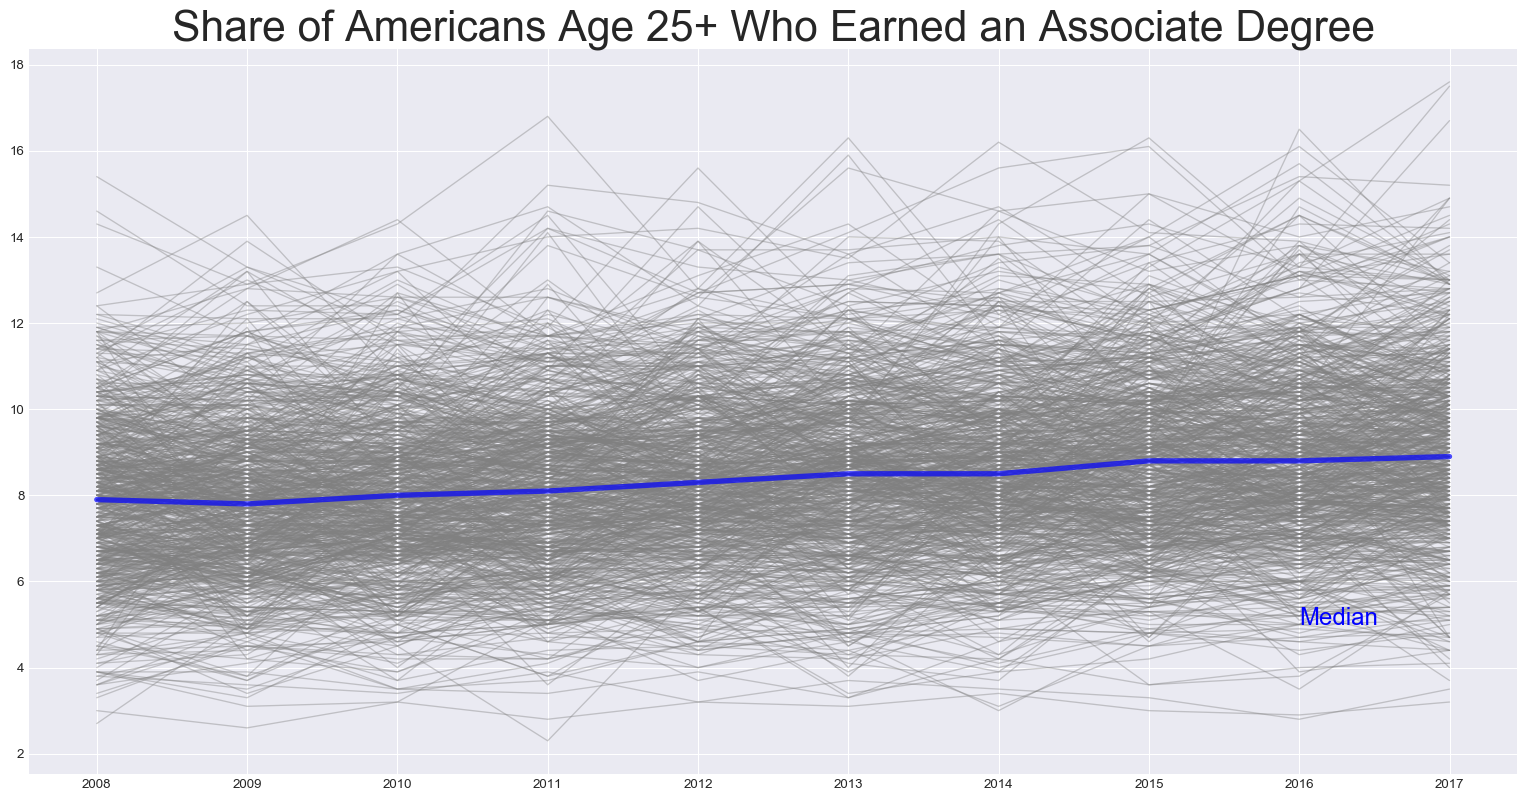

In [390]:
#Establish a style for graphs
## Associate degree
plt.style.use('seaborn-darkgrid')
my_dpi = 96
plt.figure(figsize=(1920/my_dpi, 960/my_dpi), dpi=my_dpi)

# multiple line plot
## Associate degree
for column in associateTrendCleanT.drop('year', axis=1):
    plt.plot(associateTrendCleanT['year'], associateTrendCleanT[column], marker='', color='grey', linewidth=1, alpha=0.4)

# highlight the mean
## Associate degree
plt.plot(associateTrendCleanT['year'], associateTrendCleanT['Median'], marker='', color='blue', linewidth = 4, alpha = 0.7)    

# Add chart titles and mean label
## Associate degree
plt.title("Share of Americans Age 25+ Who Earned an Associate Degree", size=32)
plt.text(8, 5, "Median", size=18, color='blue')

plt.show()

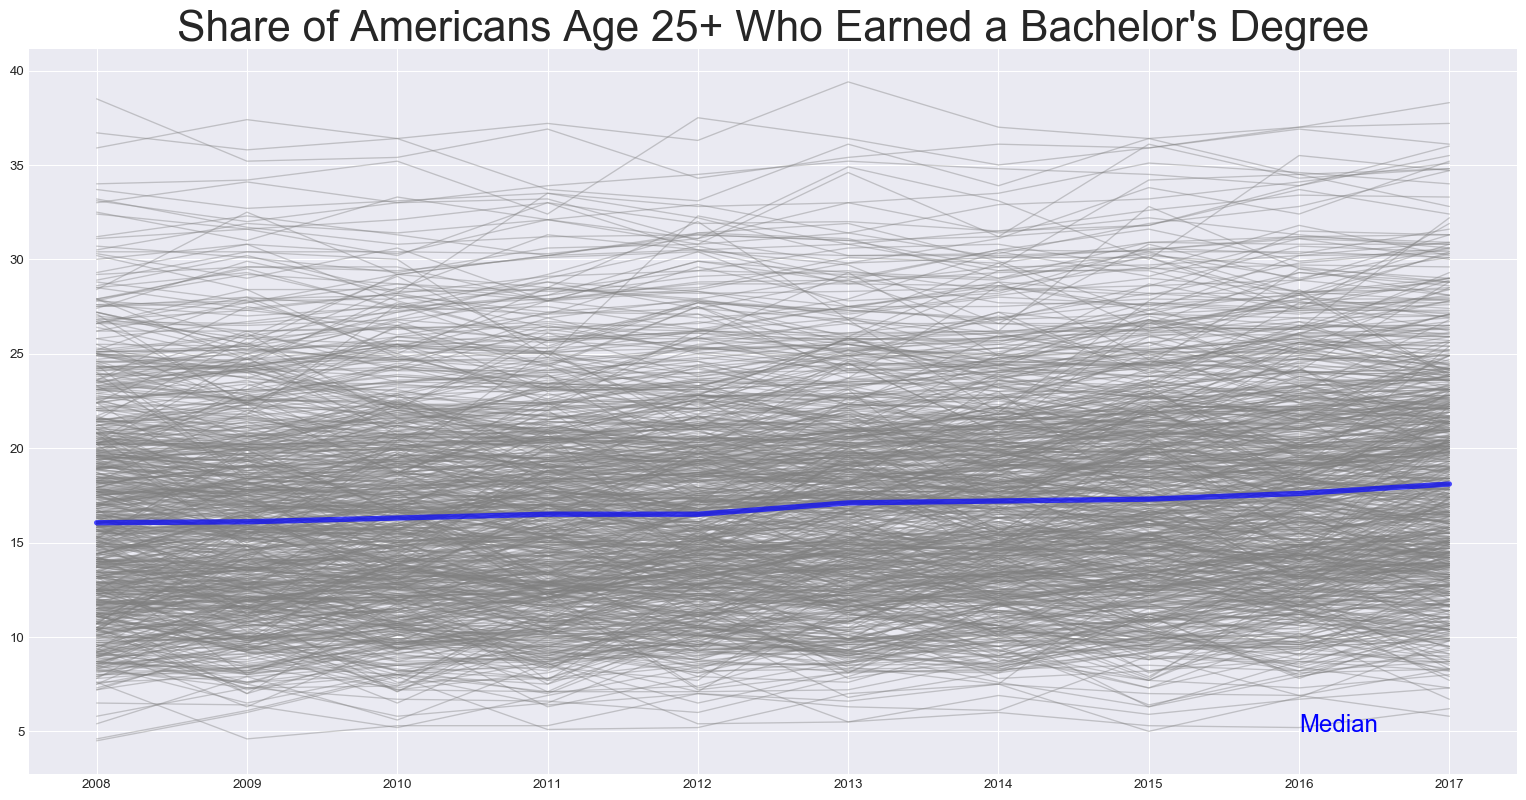

In [391]:
#Establish a style for graphs
## Bachelor degree
plt.style.use('seaborn-darkgrid')
my_dpi = 96
plt.figure(figsize=(1920/my_dpi, 960/my_dpi), dpi=my_dpi)

# multiple line plot
## Bachelor degree
for column in bachelorTrendCleanT.drop('year', axis=1):
    plt.plot(bachelorTrendCleanT['year'], bachelorTrendCleanT[column], marker='', color='grey', linewidth=1, alpha=0.4)

# highlight the mean
## Bachelor degree
plt.plot(bachelorTrendCleanT['year'], bachelorTrendCleanT['Median'], marker='', color='blue', linewidth = 4, alpha = 0.7)    

# Add chart titles and mean label
## Bachelor degree
plt.title("Share of Americans Age 25+ Who Earned a Bachelor's Degree", size=32)
plt.text(8, 5, "Median", size=18, color='blue')

plt.show()

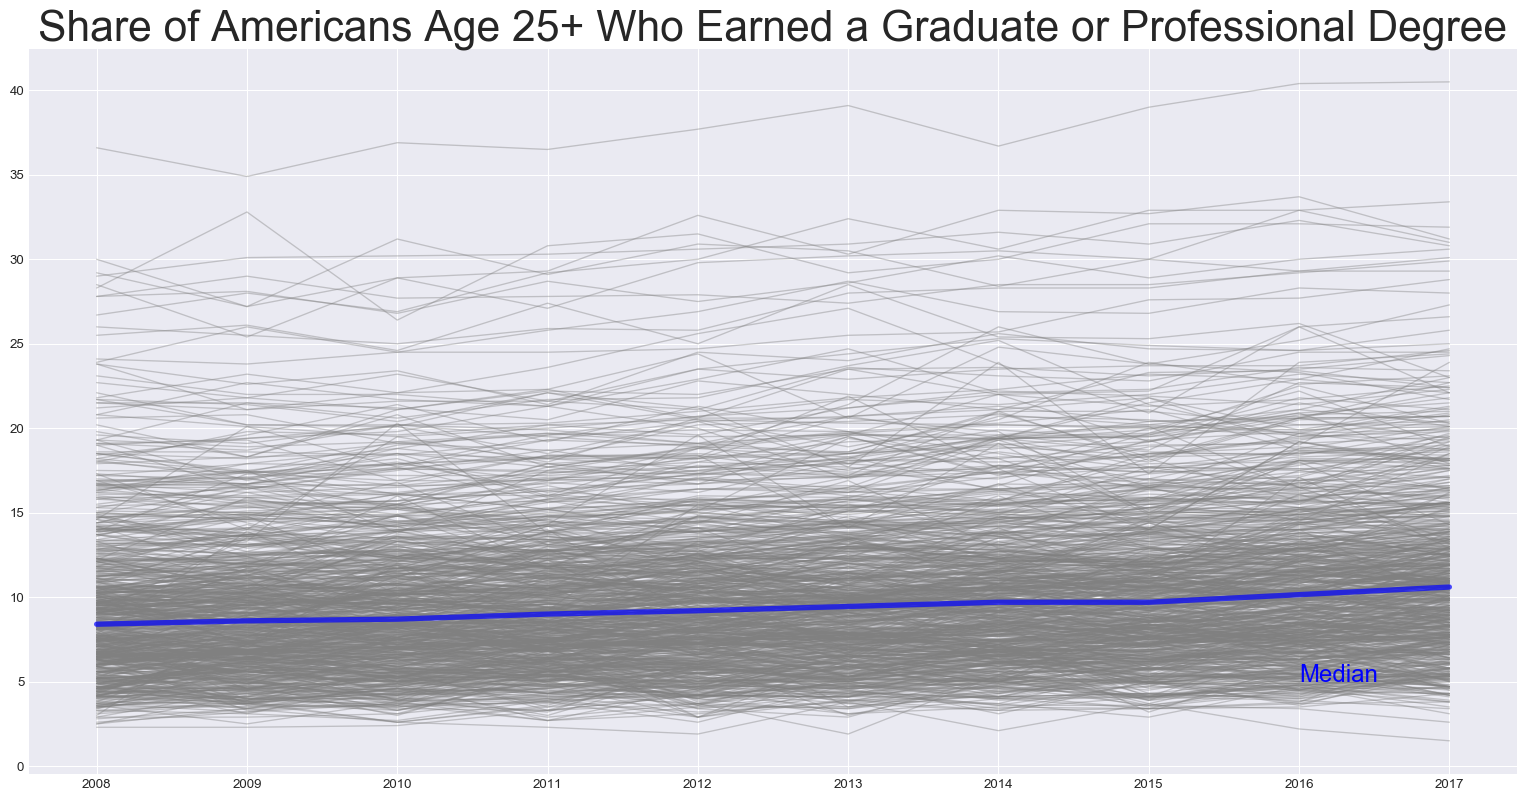

In [392]:
#Establish a style for graphs
## Graduate or Professional degree
plt.style.use('seaborn-darkgrid')
my_dpi = 96
plt.figure(figsize=(1920/my_dpi, 960/my_dpi), dpi=my_dpi)

# multiple line plot
## Bachelor degree
for column in gradTrendCleanT.drop('year', axis=1):
    plt.plot(gradTrendCleanT['year'], gradTrendCleanT[column], marker='', color='grey', linewidth=1, alpha=0.4)

# highlight the mean
## Graduate or Professional degree
plt.plot(gradTrendCleanT['year'], gradTrendCleanT['Median'], marker='', color='blue', linewidth = 4, alpha = 0.7)    

# Add chart titles and mean label
## Graduate or Professional degree
plt.title("Share of Americans Age 25+ Who Earned a Graduate or Professional Degree", size=32)
plt.text(8, 5, "Median", size=18, color='blue')

plt.show()

# Find the Percent Change

In [425]:
# Trended Percent Change for median population with less than a high school education
lessThanHighschoolPctChange = lessThanHighschoolTrendClean[-1:]
lessThanHighschoolPctChange

County  Share2008  Share2009  Share2010  Share2011  Share2012  \
Median    NaN        4.3        4.2        4.1        3.9        3.8   

        Share2013  Share2014  Share2015  Share2016  Share2017  
Median        3.8        3.7        3.6        3.5        3.3

In [426]:
lessThanHighschoolPctChange.pct_change(axis='columns')

County  Share2008  Share2009  Share2010  Share2011  Share2012  \
Median     NaN        NaN  -0.023256   -0.02381   -0.04878  -0.025641   

        Share2013  Share2014  Share2015  Share2016  Share2017  
Median        0.0  -0.026316  -0.027027  -0.027778  -0.057143

In [427]:
# Trended Percent Change for median population with a high school education but without a diploma
noDiplomaPctChange = noDiplomaTrendClean[-1:]
noDiplomaPctChange

County  Share2008  Share2009  Share2010  Share2011  Share2012  \
Median    NaN       8.25        8.1        7.9        7.7       7.45   

        Share2013  Share2014  Share2015  Share2016  Share2017  
Median        7.2       6.95        7.0        6.8        6.4

In [428]:
noDiplomaPctChange.pct_change(axis='columns')

County  Share2008  Share2009  Share2010  Share2011  Share2012  \
Median     NaN        NaN  -0.018182  -0.024691  -0.025316  -0.032468   

        Share2013  Share2014  Share2015  Share2016  Share2017  
Median  -0.033557  -0.034722   0.007194  -0.028571  -0.058824

In [429]:
# Trended Percent Change for median population with a high school diploma
hsGradPctChange = hsGradTrendClean[-1:]
hsGradPctChange

County  Share2008  Share2009  Share2010  Share2011  Share2012  \
Median    NaN       30.1       30.1       29.9       29.8       29.7   

        Share2013  Share2014  Share2015  Share2016  Share2017  
Median       29.4       29.4       29.2       29.0       28.7

In [430]:
hsGradPctChange.pct_change(axis='columns')

County  Share2008  Share2009  Share2010  Share2011  Share2012  \
Median     NaN        NaN        0.0  -0.006645  -0.003344  -0.003356   

        Share2013  Share2014  Share2015  Share2016  Share2017  
Median  -0.010101        0.0  -0.006803  -0.006849  -0.010345

In [431]:
# Trended Percent Change for median population with some college
someCollegePctChange = someCollegeTrendClean[-1:]
someCollegePctChange

County  Share2008  Share2009  Share2010  Share2011  Share2012  \
Median    NaN       22.1       22.0       22.0       22.0       22.1   

        Share2013  Share2014  Share2015  Share2016  Share2017  
Median       22.0       21.8       21.7       21.7       21.3

In [432]:
someCollegePctChange.pct_change(axis='columns')

County  Share2008  Share2009  Share2010  Share2011  Share2012  \
Median     NaN        NaN  -0.004525        0.0        0.0   0.004545   

        Share2013  Share2014  Share2015  Share2016  Share2017  
Median  -0.004525  -0.009091  -0.004587        0.0  -0.018433

In [433]:
# Trended Percent Change for median population with an Associate degree
associatePctChange = associateTrendClean[-1:]
associatePctChange

County  Share2008  Share2009  Share2010  Share2011  Share2012  \
Median    NaN        7.9        7.8        8.0        8.1        8.3   

        Share2013  Share2014  Share2015  Share2016  Share2017  
Median        8.5        8.5        8.8        8.8        8.9

In [434]:
associatePctChange.pct_change(axis='columns')

County  Share2008  Share2009  Share2010  Share2011  Share2012  \
Median     NaN        NaN  -0.012658   0.025641     0.0125   0.024691   

        Share2013  Share2014  Share2015  Share2016  Share2017  
Median   0.024096        0.0   0.035294        0.0   0.011364

In [435]:
# Trended Percent Change for median population with a Bachelor degree
bachelorPctChange = bachelorTrendClean[-1:]
bachelorPctChange

County  Share2008  Share2009  Share2010  Share2011  Share2012  \
Median    NaN      16.05       16.1       16.3       16.5       16.5   

        Share2013  Share2014  Share2015  Share2016  Share2017  
Median       17.1       17.2       17.3       17.6       18.1

In [436]:
bachelorPctChange.pct_change(axis='columns')

County  Share2008  Share2009  Share2010  Share2011  Share2012  \
Median     NaN        NaN   0.003115   0.012422    0.01227        0.0   

        Share2013  Share2014  Share2015  Share2016  Share2017  
Median   0.036364   0.005848   0.005814   0.017341   0.028409

In [437]:
# Trended Percent Change for median population with a Graduate or Professional degree
gradPctChange = gradTrendClean[-1:]
gradPctChange

County  Share2008  Share2009  Share2010  Share2011  Share2012  \
Median    NaN        8.4        8.6        8.7        9.0        9.2   

        Share2013  Share2014  Share2015  Share2016  Share2017  
Median       9.45        9.7        9.7      10.15       10.6

In [438]:
gradPctChange.pct_change(axis='columns')

County  Share2008  Share2009  Share2010  Share2011  Share2012  \
Median     NaN        NaN    0.02381   0.011628   0.034483   0.022222   

        Share2013  Share2014  Share2015  Share2016  Share2017  
Median   0.027174   0.026455        0.0   0.046392   0.044335